In [1]:
import pandas as pd  # To read data
import matplotlib.pyplot as plt
from pandas.plotting import table

# Reference: https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/
from IPython.core.display import HTML, display
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
## Load data from csv as dataframe and process data
df_csv = pd.read_csv('../dataset/metrics_dummydata.csv')

num_commits_mean = df_csv["Num_commits"].mean()
num_commits_median = df_csv["Num_commits"].median()

num_bugs_mean = df_csv["Num_bugs"].mean()
num_bugs_median = df_csv["Num_bugs"].median()

PR_opened_mean = df_csv["PR_opened"].mean()
PR_opened_median = df_csv["PR_opened"].median()

PR_closed_mean = df_csv["PR_closed"].mean()
PR_closed_median = df_csv["PR_closed"].median()

PR_merged_mean = df_csv["PR_merged"].mean()
PR_merged_median = df_csv["PR_merged"].median()

PR_unmerged_mean = df_csv["PR_unmerged"].mean()
PR_unmerged_median = df_csv["PR_unmerged"].median()

In [3]:
## Create table
data = {'Metrics':['num_commits','num_bugs','num_PRopened','num_PRclosed','num_PRmerged','num_PRunmerged'],
        'Description':['Total number of commits per repository','Total number of bugs and/or issues after each project release',
                        'Total number of opened pull requests per repository','Total number of closed pull requests per repository',
                        'Total number of merged pull requests per repository','Total number of unmerged pull requests per repository'],
        'Mean':[num_commits_mean, num_bugs_mean, PR_opened_mean, PR_closed_mean, PR_merged_mean, PR_unmerged_mean],
        'Median':[num_commits_median, num_commits_median, PR_opened_median, PR_closed_median, PR_merged_median, PR_unmerged_median]}

df = pd.DataFrame(data)

display(HTML(df.to_html()))

# print(df)

,Metrics,Description,Mean,Median
0,num_commits,Total number of commits per repository,55.90,58.5
1,num_bugs,Total number of bugs and/or issues after each project release,47.15,58.5
2,num_PRopened,Total number of opened pull requests per repository,38.45,30.5
3,num_PRclosed,Total number of closed pull requests per repository,50.20,51.5
4,num_PRmerged,Total number of merged pull requests per repository,40.95,36.5
5,num_PRunmerged,Total number of unmerged pull requests per repository,38.40,31.0


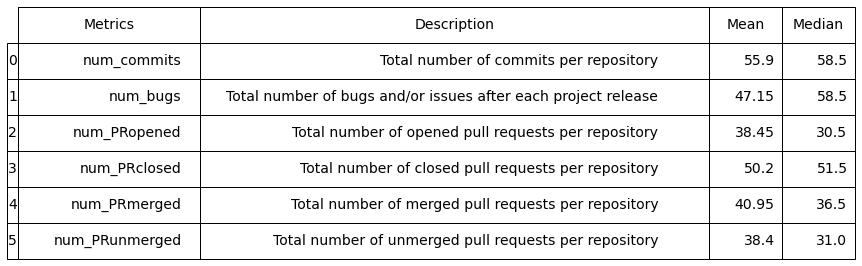

In [4]:
fig = plt.figure(figsize=(15,10))
ax = plt.subplot(641, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

tb = table(ax, df, loc='center',colWidths=[1, 2.8, 0.4, 0.4])  # where df is your data frame
tb.auto_set_font_size(False)
tb.set_fontsize(14)
tb.scale(1,3)
plt.savefig('../results/metrics_table.png', bbox_inches='tight', pad_inches=0.1)

In [6]:
## Load data from csv as dataframe and process data
df_csv = pd.read_csv('../dataset/metrics_dummydata.csv')
# print(df_csv)

productivity_performance_model = ols("Num_commits ~ Num_bugs", data=df_csv).fit()
productivity_performance_model_summary = productivity_performance_model.summary()
display(HTML(
(productivity_performance_model_summary.as_html())))
with open('../results/prod_perf.txt', 'w') as fh:
    fh.write(productivity_performance_model.summary().as_text())

productivity_activityopen_model = ols("Num_commits ~ PR_opened", data=df_csv).fit()
productivity_activityopen_model_summary = productivity_activityopen_model.summary()
display(HTML(
(productivity_activityopen_model_summary.as_html())))
with open('../results/prod_activityopen.txt', 'w') as fh:
    fh.write(productivity_activityopen_model.summary().as_text())

productivity_activityclose_model = ols("Num_commits ~ PR_closed", data=df_csv).fit()
productivity_activityclose_model_summary = productivity_activityclose_model.summary()
display(HTML(
(productivity_activityclose_model_summary.as_html())))
with open('../results/prod_activityclose.txt', 'w') as fh:
    fh.write(productivity_activityclose_model.summary().as_text())

productivity_communmerge_model = ols("Num_commits ~ PR_merged", data=df_csv).fit()
productivity_communmerge_model_summary = productivity_communmerge_model.summary()
display(HTML(
(productivity_communmerge_model_summary.as_html())))
with open('../results/prod_communmerge.txt', 'w') as fh:
    fh.write(productivity_communmerge_model.summary().as_text())

productivity_commun_unmerge_model = ols("Num_commits ~ PR_unmerged", data=df_csv).fit()
productivity_commun_unmerge_model_summary = productivity_commun_unmerge_model.summary()
display(HTML(
(productivity_commun_unmerge_model_summary.as_html())))
with open('../results/prod_commun_unmerge.txt', 'w') as fh:
    fh.write(productivity_commun_unmerge_model.summary().as_text())